In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib
from neo.io import AxonIO
#import seaborn as sns
import matplotlib.pyplot as plt
import itertools

import numpy as np
import pandas as pd

#import altair as alt
# import the data
#flydir = '/Volumes/hm_data/MN optogenetic activation/b1/1218 fly 3/'


In [2]:
flydir = '/home/alysha/analysis_files/S110/' #B2_full_df/'



In [3]:
#f1 = pd.read_csv(flydir + 's81_b2_df_fly_01.csv')
#f2 = pd.read_csv(flydir + 's81_b2_df_fly_02.csv')
#f3 = pd.read_csv(flydir + 's81_b2_df_fly_03.csv')
#f4 = pd.read_csv(flydir + 's81_b2_df_fly_04.csv')
#f5 = pd.read_csv(flydir + 's81_b2_df_fly_05.csv')
#f6 = pd.read_csv(flydir + 's81_b2_df_fly_06.csv')



f1 = pd.read_csv(flydir + 's110_b1_phase_df_fly_01.csv')
f2 = pd.read_csv(flydir + 's110_b1_phase_df_fly_02.csv')
f3 = pd.read_csv(flydir + 's110_b1_phase_df_fly_03.csv')
f4 = pd.read_csv(flydir + 's110_b1_phase_df_fly_04.csv')
#f5 = pd.read_csv(flydir + 's110_b1_phase_df_fly_05.csv')
#f6 = pd.read_csv(flydir + 's104_b2_df_fly_06.csv')
#f7 = pd.read_csv(flydir + 's104_b2_df_fly_07.csv')
#f8 = pd.read_csv(flydir + 's104_i1_df_fly_08.csv')
#f9 = pd.read_csv(flydir + 's104_i1_df_fly_09.csv')
#f10 = pd.read_csv(flydir + 's81_b2_df_fly_06.csv')

In [4]:
df = pd.concat([f1, f2, f3, f4])#, f6, f7])#, f8, f8])
#df = pd.concat([f2, f3, f4])
df.head()

,fly01_b1_phase_df1,fly01_b1_phase_df10,fly01_b1_phase_df2,fly01_b1_phase_df3,fly01_b1_phase_df4,fly01_b1_phase_df5,fly01_b1_phase_df6,fly01_b1_phase_df7,fly01_b1_phase_df8,fly01_b1_phase_df9,...,fly03_times8,fly03_times9,fly_01_b1_mean_phase,fly_01_b1_phase_error,fly_02_b1_mean_phase,fly_02_b1_phase_error,fly_03_b1_mean_phase,fly_03_b1_phase_error,fly_04_b1_mean_phase,fly_04_b1_phase_error
0,-0.379294,-0.206404,1.911026,-0.656444,-2.314536,1.110565,1.804101,-0.756332,3.044039,-1.374559,...,NaN,NaN,0.218216,0.530891,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.725507,0.127431,1.598538,-0.348131,-2.276874,1.446087,1.503262,-1.400697,3.190085,-1.309145,...,NaN,NaN,0.180505,0.540379,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.058425,0.565747,1.216283,-0.128480,-2.117560,1.678145,1.168292,-2.062945,3.271768,-1.209758,...,NaN,NaN,0.132307,0.556277,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.373132,1.085452,0.801880,-0.044013,-1.835326,1.801971,0.859537,-2.630359,3.274545,-1.074968,...,NaN,NaN,0.086559,0.575278,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.666554,1.643504,0.399163,-0.120944,-1.442218,1.829470,0.633779,-3.002025,3.186203,-0.906857,...,NaN,NaN,0.055352,0.591015,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index([u'fly01_b1_phase_df1', u'fly01_b1_phase_df10', u'fly01_b1_phase_df2',
       u'fly01_b1_phase_df3', u'fly01_b1_phase_df4', u'fly01_b1_phase_df5',
       u'fly01_b1_phase_df6', u'fly01_b1_phase_df7', u'fly01_b1_phase_df8',
       u'fly01_b1_phase_df9', u'fly01_crimson1', u'fly01_crimson10',
       u'fly01_crimson2', u'fly01_crimson3', u'fly01_crimson4',
       u'fly01_crimson5', u'fly01_crimson6', u'fly01_crimson7',
       u'fly01_crimson8', u'fly01_crimson9', u'fly01_times1', u'fly01_times10',
       u'fly01_times2', u'fly01_times3', u'fly01_times4', u'fly01_times5',
       u'fly01_times6', u'fly01_times7', u'fly01_times8', u'fly01_times9',
       u'fly02_b1_phase_df1', u'fly02_b1_phase_df2', u'fly02_b1_phase_df3',
       u'fly02_b1_phase_df4', u'fly02_b1_phase_df5', u'fly02_b1_phase_df6',
       u'fly02_b1_phase_df7', u'fly02_crimson1', u'fly02_crimson2',
       u'fly02_crimson3', u'fly02_crimson4', u'fly02_crimson5',
       u'fly02_crimson6', u'fly02_crimson7', u'fly02_times1'

In [26]:
#df['fly_01_b1_mean_phase']
#df['fly_02_b1_mean_phase']
#df['fly_03_b1_mean_phase']
#df['fly_04_b1_mean_phase']
#df['fly_05_b1_mean_phase']
#df['fly_06_b1_mean_phase']
#df['fly_02_b1_mean_phase']

In [6]:
df.to_csv('s110_b1_phase.csv', index=False)

In [7]:
df = df.fillna(0)

In [12]:
f1.head()

,fly01_b1_phase_df1,fly01_b1_phase_df10,fly01_b1_phase_df2,fly01_b1_phase_df3,fly01_b1_phase_df4,fly01_b1_phase_df5,fly01_b1_phase_df6,fly01_b1_phase_df7,fly01_b1_phase_df8,fly01_b1_phase_df9,...,fly01_times2,fly01_times3,fly01_times4,fly01_times5,fly01_times6,fly01_times7,fly01_times8,fly01_times9,fly_01_b1_mean_phase,fly_01_b1_phase_error
0,-0.379294,-0.206404,1.911026,-0.656444,-2.314536,1.110565,1.804101,-0.756332,3.044039,-1.374559,...,0.054700,0.086250,0.117000,0.147850,0.178500,0.210700,0.243350,0.277250,0.218216,0.530891
1,-0.725507,0.127431,1.598538,-0.348131,-2.276874,1.446087,1.503262,-1.400697,3.190085,-1.309145,...,0.050144,0.081786,0.112550,0.143220,0.173600,0.205566,0.238734,0.272747,0.180505,0.540379
2,-1.058425,0.565747,1.216283,-0.128480,-2.117560,1.678145,1.168292,-2.062945,3.271768,-1.209758,...,0.047264,0.078944,0.109712,0.140312,0.170591,0.202474,0.235831,0.269888,0.132307,0.556277
3,-1.373132,1.085452,0.801880,-0.044013,-1.835326,1.801971,0.859537,-2.630359,3.274545,-1.074968,...,0.046012,0.077677,0.108444,0.139073,0.169404,0.201343,0.234589,0.268628,0.086559,0.575278
4,-1.666554,1.643504,0.399163,-0.120944,-1.442218,1.829470,0.633779,-3.002025,3.186203,-0.906857,...,0.046203,0.077813,0.108572,0.139308,0.169810,0.201906,0.234816,0.268787,0.055352,0.591015


In [8]:
new_df = df

In [11]:
f1 = f2

In [8]:
f1.head()

,fly01_b1_phase_df1,fly01_b1_phase_df10,fly01_b1_phase_df2,fly01_b1_phase_df3,fly01_b1_phase_df4,fly01_b1_phase_df5,fly01_b1_phase_df6,fly01_b1_phase_df7,fly01_b1_phase_df8,fly01_b1_phase_df9,...,fly01_times2,fly01_times3,fly01_times4,fly01_times5,fly01_times6,fly01_times7,fly01_times8,fly01_times9,fly_01_b1_mean_phase,fly_01_b1_phase_error
0,-0.379294,-0.206404,1.911026,-0.656444,-2.314536,1.110565,1.804101,-0.756332,3.044039,-1.374559,...,0.054700,0.086250,0.117000,0.147850,0.178500,0.210700,0.243350,0.277250,0.218216,0.530891
1,-0.725507,0.127431,1.598538,-0.348131,-2.276874,1.446087,1.503262,-1.400697,3.190085,-1.309145,...,0.050144,0.081786,0.112550,0.143220,0.173600,0.205566,0.238734,0.272747,0.180505,0.540379
2,-1.058425,0.565747,1.216283,-0.128480,-2.117560,1.678145,1.168292,-2.062945,3.271768,-1.209758,...,0.047264,0.078944,0.109712,0.140312,0.170591,0.202474,0.235831,0.269888,0.132307,0.556277
3,-1.373132,1.085452,0.801880,-0.044013,-1.835326,1.801971,0.859537,-2.630359,3.274545,-1.074968,...,0.046012,0.077677,0.108444,0.139073,0.169404,0.201343,0.234589,0.268628,0.086559,0.575278
4,-1.666554,1.643504,0.399163,-0.120944,-1.442218,1.829470,0.633779,-3.002025,3.186203,-0.906857,...,0.046203,0.077813,0.108572,0.139308,0.169810,0.201906,0.234816,0.268787,0.055352,0.591015


In [ ]:
# Tidy the DataFrame
#df_gt = pd.melt(df_gt, var_name='genotype', value_name='location')

In [13]:
new_f1 = f1

In [14]:
#chrimson_columns = new_f1['crimson1', 'crimson2', 'crimson3', 'crimson4', 'crimson5', 'crimson6',
#                          'crimson7', 'crimson8', 'crimson9', 'crimson10', 'crimson11', 'crimson12']
                         
                         
chrimson_columns = new_f1[['crimson1', 'crimson2', 'crimson3', 'crimson4', 'crimson5', 'crimson6',
                          'crimson7', 'crimson8', 'crimson9', 'crimson10']]
#new_f1[['crimson1', 'crimson2', ]].head()
chrimson_columns.head()

KeyError: "['crimson1' 'crimson2' 'crimson3' 'crimson4' 'crimson5' 'crimson6'\n 'crimson7' 'crimson8' 'crimson9' 'crimson10'] not in index"

In [15]:
chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
chrimson_columns.head()

NameError: name 'chrimson_columns' is not defined

In [16]:
chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
chrimson_tidy.head()

NameError: name 'chrimson_columns' is not defined

In [17]:
len(chrimson_tidy['trial'])
chrimson_tidy['fly'] = 1
chrimson_tidy['muscle'] = 'b1'
chrimson_tidy.head()

NameError: name 'chrimson_tidy' is not defined

In [18]:
times_columns = new_f1[['times1', 'times2', 'times3', 'times4', 'times5', 'times6',
                          'times7', 'times8', 'times9', 'times10']]
#new_f1[['crimson1', 'crimson2', ]].head()
times_columns.head()

KeyError: "['times1' 'times2' 'times3' 'times4' 'times5' 'times6' 'times7' 'times8'\n 'times9' 'times10'] not in index"

In [69]:
times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
times_columns.head()

,1,2,3,4,5,6,7,8,9,10
0,2.814452,8.814255,14.814259,20.814462,26.814366,32.814519,38.814273,44.814276,50.814230,56.814333
1,1.592264,7.592005,13.592026,19.592302,25.592160,31.592377,37.592103,43.592053,49.591646,55.591785
2,1.265707,7.265466,13.265483,19.265737,25.265609,31.265807,37.265541,43.265506,49.265205,55.265334
3,1.645055,7.644881,13.644878,19.645055,25.644975,31.645106,37.644869,43.644892,49.644974,55.645065
4,2.389538,8.389429,14.389408,20.389510,26.389477,32.389542,38.389333,44.389412,50.389870,56.389923


In [65]:
times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
times_tidy.head()

,trial,times(sec)
0,1,2.814452
1,1,1.592264
2,1,1.265707
3,1,1.645055
4,1,2.389538


In [67]:
chrimson_tidy['times(sec)']=times_tidy['times(sec)']
chrimson_tidy.head()

,trial,chrimson_power,fly,muscle,times(sec)
0,1,1.997986,1,b2,2.814452
1,1,1.842935,1,b2,1.592264
2,1,1.420617,1,b2,1.265707
3,1,0.845925,1,b2,1.645055
4,1,0.268220,1,b2,2.389538


In [71]:
columns =new_f1.columns
columns

Index([u'crimson1', u'crimson10', u'crimson2', u'crimson3', u'crimson4',
       u'crimson5', u'crimson6', u'crimson7', u'crimson8', u'crimson9',
       u'fly01_b2_df1', u'fly01_b2_df10', u'fly01_b2_df2', u'fly01_b2_df3',
       u'fly01_b2_df4', u'fly01_b2_df5', u'fly01_b2_df6', u'fly01_b2_df7',
       u'fly01_b2_df8', u'fly01_b2_df9', u'fly_01_b2_freq_error',
       u'fly_01_b2_mean_freq_change', u'fly_01_b2_mean_freq_change_series',
       u'times1', u'times10', u'times2', u'times3', u'times4', u'times5',
       u'times6', u'times7', u'times8', u'times9'],
      dtype='object')

In [75]:
muscle_activity_columns = new_f1[['fly01_b2_df1', 'fly01_b2_df2', 'fly01_b2_df3', 'fly01_b2_df4', 'fly01_b2_df5', 'fly01_b2_df6',
                          'fly01_b2_df7', 'fly01_b2_df8', 'fly01_b2_df9', 'fly01_b2_df10']]
#new_f1[['crimson1', 'crimson2', ]].head()
muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
#muscle_activity_columns.head()
muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
muscle_activity_tidy.head()

,trial,muscle_activity
0,1,4.825988e-13
1,1,-3.985807e+00
2,1,-5.049769e+00
3,1,-3.812141e+00
4,1,-1.384995e+00


In [76]:
chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
chrimson_tidy.head()

,trial,chrimson_power,fly,muscle,times(sec),muscle_activity
0,1,1.997986,1,b2,2.814452,4.825988e-13
1,1,1.842935,1,b2,1.592264,-3.985807e+00
2,1,1.420617,1,b2,1.265707,-5.049769e+00
3,1,0.845925,1,b2,1.645055,-3.812141e+00
4,1,0.268220,1,b2,2.389538,-1.384995e+00


In [ ]:
#fly_01_b2_mean_freq_change' 
#'fly_01_b2_mean_freq_change_series'
#calculate separately

In [77]:
fly_1_tidy = chrimson_tidy

In [102]:
inds = chrimson_tidy.index.values
chrimson_tidy['inds'] = chrimson_tidy.index.values
chrimson_tidy.head()

,trial,chrimson_power,fly,muscle,times(sec),muscle_activity,inds
0,1,1.997070,6,b2,9.204456,9.876537,0
1,1,1.841796,6,b2,7.981881,10.739053,1
2,1,1.419303,6,b2,7.655438,10.965954,2
3,1,0.844577,6,b2,8.035197,10.696237,3
4,1,0.267042,6,b2,8.780084,10.173079,4


In [11]:
df=df.fillna(0)

In [19]:
#fly_list = f1, f2, f3, f4, f5, f6
fly_list = f1, f2, f3, f4#, f6, f7#, f8, f9#, f10
trial = np.arange(1,12)

In [20]:
for f in range(len(fly_list)): 
    new_f = fly_list[f]
    
    if  f == 0:
        chrimson_columns = new_f[['fly01_crimson1', 'fly01_crimson2', 'fly01_crimson3', 'fly01_crimson4', 'fly01_crimson5', 'fly01_crimson6',
                              'fly01_crimson7', 'fly01_crimson8', 'fly01_crimson9', 'fly01_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly01_times1', 'fly01_times2', 'fly01_times3', 'fly01_times4', 'fly01_times5', 'fly01_times6',
                              'fly01_times7', 'fly01_times8', 'fly01_times9', 'fly01_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly01_b2_df1', 'fly01_b2_df2', 'fly01_b2_df3', 'fly01_b2_df4', 'fly01_b2_df5', 'fly01_b2_df6',
                              'fly01_b2_df7', 'fly01_b2_df8', 'fly01_b2_df9', 'fly01_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_1 = chrimson_tidy

        
    
    if  f == 1-2:
        chrimson_columns = new_f[['fly02_crimson1', 'fly02_crimson2', 'fly02_crimson3', 'fly02_crimson4', 'fly02_crimson5', 'fly02_crimson6',
                              'fly02_crimson7', 'fly02_crimson8', 'fly02_crimson9', 'fly02_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly02_times1', 'fly02_times2', 'fly02_times3', 'fly02_times4', 'fly02_times5', 'fly02_times6',
                              'fly02_times7', 'fly02_times8', 'fly02_times9', 'fly02_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly02_b2_df1', 'fly02_b2_df2', 'fly02_b2_df3', 'fly02_b2_df4', 'fly02_b2_df5', 'fly02_b2_df6',
                              'fly02_b2_df7', 'fly02_b2_df8', 'fly02_b2_df9', 'fly02_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        df_2 = chrimson_tidy
        
        
        
        
    if f == 1:
        chrimson_columns = new_f[['fly03_crimson1', 'fly03_crimson2', 'fly03_crimson3', 'fly03_crimson4', 'fly03_crimson5', 'fly03_crimson6',
                              'fly03_crimson7', 'fly03_crimson8', 'fly03_crimson9', 'fly03_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly03_times1', 'fly03_times2', 'fly03_times3', 'fly03_times4', 'fly03_times5', 'fly03_times6',
                              'fly03_times7', 'fly03_times8', 'fly03_times9', 'fly03_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly03_b2_df1', 'fly03_b2_df2', 'fly03_b2_df3', 'fly03_b2_df4', 'fly03_b2_df5', 'fly03_b2_df6',
                              'fly03_b2_df7', 'fly03_b2_df8', 'fly03_b2_df9', 'fly03_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        
        df_3 = chrimson_tidy
            
    
        
    if f == 1:
        chrimson_columns = new_f[['fly04_crimson1', 'fly04_crimson2', 'fly04_crimson3', 'fly04_crimson4', 'fly04_crimson5', 'fly04_crimson6',
                              'fly04_crimson7', 'fly04_crimson8', 'fly04_crimson9', 'fly04_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly04_times1', 'fly04_times2', 'fly04_times3', 'fly04_times4', 'fly04_times5', 'fly04_times6',
                              'fly04_times7', 'fly04_times8', 'fly04_times9', 'fly04_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly04_b2_df1', 'fly04_b2_df2', 'fly04_b2_df3', 'fly04_b2_df4', 'fly04_b2_df5', 'fly04_b2_df6',
                              'fly04_b2_df7', 'fly04_b2_df8', 'fly04_b2_df9', 'fly04_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_4 = chrimson_tidy
        
        
    
    if f == 4:
        chrimson_columns = new_f[['fly05_crimson1', 'fly05_crimson2', 'fly05_crimson3', 'fly05_crimson4', 'fly05_crimson5', 'fly05_crimson6',
                              'fly05_crimson7', 'fly05_crimson8', 'fly05_crimson9', 'fly05_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly05_times1', 'fly05_times2', 'fly05_times3', 'fly05_times4', 'fly05_times5', 'fly05_times6',
                              'fly05_times7', 'fly05_times8', 'fly05_times9', 'fly05_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly05_b2_df1', 'fly05_b2_df2', 'fly05_b2_df3', 'fly05_b2_df4', 'fly05_b2_df5', 'fly05_b2_df6',
                              'fly05_b2_df7', 'fly05_b2_df8', 'fly05_b2_df9', 'fly05_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_5 = chrimson_tidy
        
    if f == 5:
        chrimson_columns = new_f[['fly06_crimson1', 'fly06_crimson2', 'fly06_crimson3', 'fly06_crimson4', 'fly06_crimson5', 'fly06_crimson6',
                              'fly06_crimson7', 'fly06_crimson8', 'fly06_crimson9', 'fly06_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly06_times1', 'fly06_times2', 'fly06_times3', 'fly06_times4', 'fly06_times5', 'fly06_times6',
                              'fly06_times7', 'fly06_times8', 'fly06_times9', 'fly06_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly06_b2_df1', 'fly06_b2_df2', 'fly06_b2_df3', 'fly06_b2_df4', 'fly06_b2_df5', 'fly06_b2_df6',
                              'fly06_b2_df7', 'fly06_b2_df8', 'fly06_b2_df9', 'fly06_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_6 = chrimson_tidy
        
    if f == 6-1:
        chrimson_columns = new_f[['fly07_crimson1', 'fly07_crimson2', 'fly07_crimson3', 'fly07_crimson4', 'fly07_crimson5', 'fly07_crimson6',
                              'fly07_crimson7', 'fly07_crimson8', 'fly07_crimson9', 'fly07_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly07_times1', 'fly07_times2', 'fly07_times3', 'fly07_times4', 'fly07_times5', 'fly07_times6',
                              'fly07_times7', 'fly07_times8', 'fly07_times9', 'fly07_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly07_b2_df1', 'fly07_b2_df2', 'fly07_b2_df3', 'fly07_b2_df4', 'fly07_b2_df5', 'fly07_b2_df6',
                              'fly07_b2_df7', 'fly07_b2_df8', 'fly07_b2_df9', 'fly07_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_7 = chrimson_tidy
        
    if f == 7-1:
        chrimson_columns = new_f[['fly08_crimson1', 'fly08_crimson2', 'fly08_crimson3', 'fly08_crimson4', 'fly08_crimson5', 'fly08_crimson6',
                              'fly08_crimson7', 'fly08_crimson8', 'fly08_crimson9', 'fly08_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly08_times1', 'fly08_times2', 'fly08_times3', 'fly08_times4', 'fly08_times5', 'fly08_times6',
                              'fly08_times7', 'fly08_times8', 'fly08_times9', 'fly08_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly08_i1_df1', 'fly08_i1_df2', 'fly08_i1_df3', 'fly08_i1_df4', 'fly08_i1_df5', 'fly08_i1_df6',
                              'fly08_i1_df7', 'fly08_i1_df8', 'fly08_i1_df9', 'fly08_i1_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_8 = chrimson_tidy
        
    if f == 8-1:
        chrimson_columns = new_f[['fly09_crimson1', 'fly09_crimson2', 'fly09_crimson3', 'fly09_crimson4', 'fly09_crimson5', 'fly09_crimson6',
                              'fly09_crimson7', 'fly09_crimson8', 'fly09_crimson9', 'fly09_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly09_times1', 'fly09_times2', 'fly09_times3', 'fly09_times4', 'fly09_times5', 'fly09_times6',
                              'fly09_times7', 'fly09_times8', 'fly09_times9', 'fly09_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly09_i1_df1', 'fly09_i1_df2', 'fly09_i1_df3', 'fly09_i1_df4', 'fly09_i1_df5', 'fly09_i1_df6',
                              'fly09_i1_df7', 'fly09_i1_df8', 'fly09_i1_df9', 'fly09_i1_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_9 = chrimson_tidy
    '''    
    if f == 5:
        chrimson_columns = new_f[['fly06_crimson1', 'fly06_crimson2', 'fly06_crimson3', 'fly06_crimson4', 'fly06_crimson5', 'fly06_crimson6',
                              'fly06_crimson7', 'fly06_crimson8', 'fly06_crimson9', 'fly06_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b2'
        times_columns = new_f[['fly06_times1', 'fly06_times2', 'fly06_times3', 'fly06_times4', 'fly06_times5', 'fly06_times6',
                              'fly06_times7', 'fly06_times8', 'fly06_times9', 'fly06_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly06_b2_df1', 'fly06_b2_df2', 'fly06_b2_df3', 'fly06_b2_df4', 'fly06_b2_df5', 'fly06_b2_df6',
                              'fly06_b2_df7', 'fly06_b2_df8', 'fly06_b2_df9', 'fly06_b2_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_6 = chrimson_tidy
        
    '''

KeyError: "['fly01_b2_df1' 'fly01_b2_df2' 'fly01_b2_df3' 'fly01_b2_df4'\n 'fly01_b2_df5' 'fly01_b2_df6' 'fly01_b2_df7' 'fly01_b2_df8'\n 'fly01_b2_df9' 'fly01_b2_df10'] not in index"

In [25]:
for f in range(len(fly_list)): 
    new_f = fly_list[f]
    
    if  f == 0:
        chrimson_columns = new_f[['fly01_crimson1', 'fly01_crimson2', 'fly01_crimson3', 'fly01_crimson4', 'fly01_crimson5', 'fly01_crimson6',
                              'fly01_crimson7', 'fly01_crimson8', 'fly01_crimson9', 'fly01_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b1'
        times_columns = new_f[['fly01_times1', 'fly01_times2', 'fly01_times3', 'fly01_times4', 'fly01_times5', 'fly01_times6',
                              'fly01_times7', 'fly01_times8', 'fly01_times9', 'fly01_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly01_b1_phase_df1', 'fly01_b1_phase_df2', 'fly01_b1_phase_df3', 'fly01_b1_phase_df4', 'fly01_b1_phase_df5', 'fly01_b1_phase_df6',
                              'fly01_b1_phase_df7', 'fly01_b1_phase_df8', 'fly01_b1_phase_df9', 'fly01_b1_phase_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_1 = chrimson_tidy

        
    
    if  f == 1-2:
        chrimson_columns = new_f[['fly02_crimson1', 'fly02_crimson2', 'fly02_crimson3', 'fly02_crimson4', 'fly02_crimson5', 'fly02_crimson6',
                              'fly02_crimson7', 'fly02_crimson8', 'fly02_crimson9', 'fly02_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f
        chrimson_tidy['muscle'] = 'b1'
        times_columns = new_f[['fly02_times1', 'fly02_times2', 'fly02_times3', 'fly02_times4', 'fly02_times5', 'fly02_times6',
                              'fly02_times7', 'fly02_times8', 'fly02_times9', 'fly02_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly02_b1_phase_df1', 'fly02_b1_phase_df2', 'fly02_b1_phase_df3', 'fly02_b1_phase_df4', 'fly02_b1_phase_df5', 'fly02_b1_phase_df6',
                              'fly02_b1_phase_df7', 'fly02_b1_phase_df8', 'fly02_b1_phase_df9', 'fly02_b1_phase_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        df_2 = chrimson_tidy
        
        
        
        
    if f == 2:
        chrimson_columns = new_f[['fly03_crimson1', 'fly03_crimson2', 'fly03_crimson3', 'fly03_crimson4', 'fly03_crimson5', 'fly03_crimson6',
                              'fly03_crimson7', 'fly03_crimson8', 'fly03_crimson9', 'fly03_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b1'
        times_columns = new_f[['fly03_times1', 'fly03_times2', 'fly03_times3', 'fly03_times4', 'fly03_times5', 'fly03_times6',
                              'fly03_times7', 'fly03_times8', 'fly03_times9', 'fly03_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly03_b1_phase_df1', 'fly03_b1_phase_df2', 'fly03_b1_phase_df3', 'fly03_b1_phase_df4', 'fly03_b1_phase_df5', 'fly03_b1_phase_df6',
                              'fly03_b1_phase_df7', 'fly03_b1_phase_df8', 'fly03_b1_phase_df9', 'fly03_b1_phase_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        
        df_3 = chrimson_tidy
            
    
        
    if f == 3+1:
        chrimson_columns = new_f[['fly04_crimson1', 'fly04_crimson2', 'fly04_crimson3', 'fly04_crimson4', 'fly04_crimson5', 'fly04_crimson6',
                              'fly04_crimson7', 'fly04_crimson8', 'fly04_crimson9', 'fly04_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b1'
        times_columns = new_f[['fly04_times1', 'fly04_times2', 'fly04_times3', 'fly04_times4', 'fly04_times5', 'fly04_times6',
                              'fly04_times7', 'fly04_times8', 'fly04_times9', 'fly04_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly04_b1_phase_df1', 'fly04_b1_phase_df2', 'fly04_b1_phase_df3', 'fly04_b1_phase_df4', 'fly04_b1_phase_df5', 'fly04_b1_phase_df6',
                              'fly04_b1_phase_df7', 'fly04_b1_phase_df8', 'fly04_b1_phase_df9', 'fly04_b1_phase_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_4 = chrimson_tidy
        
        
    
    if f == 4:
        chrimson_columns = new_f[['fly05_crimson1', 'fly05_crimson2', 'fly05_crimson3', 'fly05_crimson4', 'fly05_crimson5', 'fly05_crimson6',
                              'fly05_crimson7', 'fly05_crimson8', 'fly05_crimson9', 'fly05_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b1'
        times_columns = new_f[['fly05_times1', 'fly05_times2', 'fly05_times3', 'fly05_times4', 'fly05_times5', 'fly05_times6',
                              'fly05_times7', 'fly05_times8', 'fly05_times9', 'fly05_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly05_b1_phase_df1', 'fly05_b1_phase_df2', 'fly05_b1_phase_df3', 'fly05_b1_phase_df4', 'fly05_b1_phase_df5', 'fly05_b1_phase_df6',
                              'fly05_b1_phase_df7', 'fly05_b1_phase_df8', 'fly05_b1_phase_df9', 'fly05_b1_phase_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_5 = chrimson_tidy
        
    if f == 5:
        chrimson_columns = new_f[['fly06_crimson1', 'fly06_crimson2', 'fly06_crimson3', 'fly06_crimson4', 'fly06_crimson5', 'fly06_crimson6',
                              'fly06_crimson7', 'fly06_crimson8', 'fly06_crimson9', 'fly06_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b1'
        times_columns = new_f[['fly06_times1', 'fly06_times2', 'fly06_times3', 'fly06_times4', 'fly06_times5', 'fly06_times6',
                              'fly06_times7', 'fly06_times8', 'fly06_times9', 'fly06_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly06_b1_phase_df1', 'fly06_b1_phase_df2', 'fly06_b1_phase_df3', 'fly06_b1_phase_df4', 'fly06_b1_phase_df5', 'fly06_b1_phase_df6',
                              'fly06_b1_phase_df7', 'fly06_b1_phase_df8', 'fly06_b1_phase_df9', 'fly06_b1_phase_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_6 = chrimson_tidy
        
    if f == 6:
        chrimson_columns = new_f[['fly07_crimson1', 'fly07_crimson2', 'fly07_crimson3', 'fly07_crimson4', 'fly07_crimson5', 'fly07_crimson6',
                              'fly07_crimson7', 'fly07_crimson8', 'fly07_crimson9', 'fly07_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b1'
        times_columns = new_f[['fly07_times1', 'fly07_times2', 'fly07_times3', 'fly07_times4', 'fly07_times5', 'fly07_times6',
                              'fly07_times7', 'fly07_times8', 'fly07_times9', 'fly07_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly07_b1_phase_df1', 'fly07_b1_phase_df2', 'fly07_b1_phase_df3', 'fly07_b1_phase_df4', 'fly07_b1_phase_df5', 'fly07_b1_phase_df6',
                              'fly07_b1_phase_df7', 'fly07_b1_phase_df8', 'fly07_b1_phase_df9', 'fly07_b1_phase_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_7 = chrimson_tidy
        
    if f == 7-1:
        chrimson_columns = new_f[['fly08_crimson1', 'fly08_crimson2', 'fly08_crimson3', 'fly08_crimson4', 'fly08_crimson5', 'fly08_crimson6',
                              'fly08_crimson7', 'fly08_crimson8', 'fly08_crimson9', 'fly08_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b1'
        times_columns = new_f[['fly08_times1', 'fly08_times2', 'fly08_times3', 'fly08_times4', 'fly08_times5', 'fly08_times6',
                              'fly08_times7', 'fly08_times8', 'fly08_times9', 'fly08_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly08_i1_df1', 'fly08_i1_df2', 'fly08_i1_df3', 'fly08_i1_df4', 'fly08_i1_df5', 'fly08_i1_df6',
                              'fly08_i1_df7', 'fly08_i1_df8', 'fly08_i1_df9', 'fly08_i1_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_8 = chrimson_tidy
        
    if f == 8-1:
        chrimson_columns = new_f[['fly09_crimson1', 'fly09_crimson2', 'fly09_crimson3', 'fly09_crimson4', 'fly09_crimson5', 'fly09_crimson6',
                              'fly09_crimson7', 'fly09_crimson8', 'fly09_crimson9', 'fly09_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b1'
        times_columns = new_f[['fly09_times1', 'fly09_times2', 'fly09_times3', 'fly09_times4', 'fly09_times5', 'fly09_times6',
                              'fly09_times7', 'fly09_times8', 'fly09_times9', 'fly09_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly09_i1_df1', 'fly09_i1_df2', 'fly09_i1_df3', 'fly09_i1_df4', 'fly09_i1_df5', 'fly09_i1_df6',
                              'fly09_i1_df7', 'fly09_i1_df8', 'fly09_i1_df9', 'fly09_i1_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_9 = chrimson_tidy
    '''    
    if f == 5:
        chrimson_columns = new_f[['fly06_crimson1', 'fly06_crimson2', 'fly06_crimson3', 'fly06_crimson4', 'fly06_crimson5', 'fly06_crimson6',
                              'fly06_crimson7', 'fly06_crimson8', 'fly06_crimson9', 'fly06_crimson10']]
        chrimson_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        chrimson_tidy = pd.melt(chrimson_columns, value_name = 'chrimson_power', var_name = 'trial')
        chrimson_tidy['fly'] = f+1
        chrimson_tidy['muscle'] = 'b1_phase'
        times_columns = new_f[['fly06_times1', 'fly06_times2', 'fly06_times3', 'fly06_times4', 'fly06_times5', 'fly06_times6',
                              'fly06_times7', 'fly06_times8', 'fly06_times9', 'fly06_times10']]
        times_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        times_tidy = pd.melt(times_columns, value_name = 'times(sec)', var_name = 'trial')
        chrimson_tidy['times(sec)']=times_tidy['times(sec)']
        muscle_activity_columns = new_f[['fly06_b1_phase_df1', 'fly06_b1_phase_df2', 'fly06_b1_phase_df3', 'fly06_b1_phase_df4', 'fly06_b1_phase_df5', 'fly06_b1_phase_df6',
                              'fly06_b1_phase_df7', 'fly06_b1_phase_df8', 'fly06_b1_phase_df9', 'fly06_b1_phase_df10']]
        muscle_activity_columns.columns = ['1', '2', '3', '4 ', '5', '6', '7', '8 ', '9', '10']
        muscle_activity_tidy = pd.melt(muscle_activity_columns, value_name = 'muscle_activity', var_name = 'trial')
        chrimson_tidy['muscle_activity']=muscle_activity_tidy['muscle_activity']
        chrimson_tidy['inds'] = chrimson_tidy.index.values
        df_6 = chrimson_tidy
        
    '''

In [27]:
df_1.head()

,trial,chrimson_power,fly,muscle,times(sec),muscle_activity,inds
0,1,0.009460,1,b1,0.028850,-0.379294,0
1,1,0.009493,1,b1,0.024927,-0.725507,1
2,1,0.009538,1,b1,0.022315,-1.058425,2
3,1,0.009595,1,b1,0.020991,-1.373132,3
4,1,0.009664,1,b1,0.020839,-1.666554,4


In [29]:
full_df = df_1.append([df_3])#, df_4])#, df_6])#, df_7, df_8, df_9], ignore_index=True)
#full_df = df_1.append([df_3, df_4], ignore_index=True)

In [30]:
full_df.head()

,trial,chrimson_power,fly,muscle,times(sec),muscle_activity,inds
0,1,0.009460,1,b1,0.028850,-0.379294,0
1,1,0.009493,1,b1,0.024927,-0.725507,1
2,1,0.009538,1,b1,0.022315,-1.058425,2
3,1,0.009595,1,b1,0.020991,-1.373132,3
4,1,0.009664,1,b1,0.020839,-1.666554,4


In [31]:
full_df.to_csv('s110_df_b1_experimental_mod.csv', index=False)

In [29]:
fly_list = f1, f2, f3, f4, f5, f6
trial = np.arange(1,12)

NameError: name 'f5' is not defined

In [25]:
### make dictionary 

In [26]:
for header in range(len(headers)):
    if headers[header][0:4] == 'crim':
        crimson_on = []
        crimson_off = []



In [31]:
fig =plt.figure(1)

for fly in range(len(fly_list)):

    x = np.arange(prior_off_signal, next_on_signal)
    xnew = np.linspace(prior_off_signal, next_on_signal, 10000, endpoint=False)

    ax2 = fig.add_subplot(212)

    import matplotlib.pyplot as plt
    plt.plot(x, alt_f, 'go-', xnew, f3, '.-', next_on_signal, alt_f[11], 'ro')
    ax2.axvspan(on_signal, off_signal, facecolor = 'r', edgecolor = 'none', alpha = 0.2)
    #ax2.axvspan(prior_on_signal, prior_off_signal, facecolor = 'r', edgecolor = 'none', alpha = 0.2)
    plt.legend(['data', 'resampled'], loc='best')
    plt.show()

NameError: name 'prior_off_signal' is not defined

In [26]:
for f in flylist: 
    for t in trial:
        if t < 10:
            print(d['fly0' %f 'b2_df_0' %t])
        if t > 10: 
            print(d['fly0' %f 'b2_df_' %t])

SyntaxError: invalid syntax (<ipython-input-26-d1a82a309685>, line 4)

In [30]:
fig =plt.figure(18)

x = np.arange(prior_off_signal, next_on_signal)
xnew = np.linspace(prior_off_signal, next_on_signal, 10000, endpoint=False)

ax2 = fig.add_subplot(212)

import matplotlib.pyplot as plt
plt.plot(x, alt_f, 'go-', xnew, f3, '.-', next_on_signal, alt_f[11], 'ro')
ax2.axvspan(on_signal, off_signal, facecolor = 'r', edgecolor = 'none', alpha = 0.2)
#ax2.axvspan(prior_on_signal, prior_off_signal, facecolor = 'r', edgecolor = 'none', alpha = 0.2)
plt.legend(['data', 'resampled'], loc='best')
plt.show()

NameError: name 'prior_off_signal' is not defined

NameError: name 'xnew' is not defined

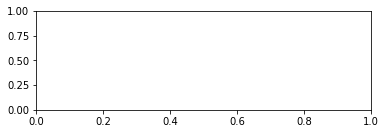

In [16]:
fig =plt.figure(15)

ax1 = plt.subplot(211)

for i in new_df:
    ax1.plot(xnew, new_df[i], 'b', linewidth =0.5, alpha = 0.2)
    
    
ax1.set_ylim((-10,500))
#ax1.set_ylimit(-0.1, 100)
#ax1.set_xlim((1200000,1300000))


mean_freq_change = new_df.mean(axis=1)
ax1.plot(xnew, mean_freq_change, 'b', linewidth =2.0)

ax1.axvspan(on_signal, off_signal, facecolor = 'r', edgecolor = 'none', alpha = 0.2)

'''
ax1.plot(times, crimson, 'r', linewidth =1.0)

ax2 = plt.subplot(212, sharex=ax1)
ax2.set_ylim(0, 20)
#ax2.set_xlim(20, 80)
#savitzky_golay
'''
'''freq_hat = savgol_filter(b2_frequencies, 7, 5) # window size 51, polynomial order 3'''
#freq_hat= b2_frequencies 
#ax2.plot(times_k, b2_frequencies,'k', linewidth = 0.75)
        
#for i in range(len(crimson_on)):
#    ax1.axvspan(times[crimson_on[i]], times[crimson_off[i]], facecolor = 'r', edgecolor = 'none', alpha = 0.3)
#    #ax2.axvspan(times[crimson_on[i]], times[crimson_off[i]], facecolor = 'r', edgecolor = 'none', alpha = 0.3)

In [ ]:
mean_freq_change = new_df.mean(axis=1)
freq_error = stats.sem(new_df,axis = 1)

In [ ]:
fig =plt.figure(16)


#wbf_means = wbf_means[0:len(wbf_means):10]
#wbf_error = stats.sem(all_wbf,axis = 0)
#wbf_error = wbf_error[0:len(wbf_error):10]

ax2 = fig.add_subplot(212)

ax2.set_ylim((-30,150))
#ax1.set_ylimit(-0.1, 100)
#ax2.set_xlim((1220000,1300000))
#ax2.set_xlim((1340000,1400000))

#ax2.axvspan(0.25, .75, facecolor = 'r', edgecolor = 'none', alpha = 0.3)
ax2.axvspan(on_signal, off_signal, facecolor = 'r', edgecolor = 'none', alpha = 0.2)
ax2.plot(xnew,mean_freq_change, 'b')
ax2.fill_between(xnew,mean_freq_change+freq_error, mean_freq_change-freq_error,color='k', alpha = 0.3, edgecolor = 'none')

ax2.set_title(r'$\mathrm{Activity\ of\ Power \ Muscle:}$', size=12, horizontalalignment='center',  y=1.08)#   \ \mu=100,\ \sigma=15$', size=12, horizontalalignment='center',  y=1.08) #verticalalignment='top')
ax2.set_ylabel('Frequency of Power Muscle Firing', size=10)
plt.xlabel('Time (s)', size=10) # $\phi$', size=10)
#ax2.title('B2 spike frequency')